1. Accede a spotify con tu cuenta: https://developer.spotify.com/documentation/web-api
2. Ingresa al dashboard con tu cuenta https://developer.spotify.com/dashboard
3. Crea una app con una variante del nombre Fundamentos Big Data, explica que es un ejercicio de clase, la URL y URI son las mismas, elige una direccion de pagina web a la que tengas acceso
4. Copia el Client ID y Client Secret de la app que acabas de crear
5. Instalar la libreria de python para la api de spotify


In [1]:
#no necesario: pip install typing-extensions==3.10.0.0

In [2]:
# no necesario: pip install --upgrade spacy


Necesario instalar:

In [3]:
#pip install spotipy

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
#librerias necesarias para la conexion
import requests
import json

In [9]:
# Ingresa las claves de tu app en el Dashboard de spotify
# Ingresa las claves de tu app en el Dashboard de spotify
client_id = "9f25cfc8480b4032ad3d6a9d59933d05"
client_secret = "007ca8de9e384baebbd731f14500e256"


In [11]:
# Iniciar el cliente de spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


### Encontrar las mas populares

In [12]:
# Lista Top 50, encontrar las 10 mas escuchadas
top_tracks = sp.playlist_tracks('0bjJHQh5Vd3ko386LsCUk5', limit=9) 

In [13]:
# Imprimir el nombre de las 10 mas escuchadas
for idx, track in enumerate(top_tracks['items']):
    track_name = track['track']['name']
    artist_name = track['track']['artists'][0]['name']
    print(f"{idx + 1}. {track_name} by {artist_name}")

1. Black Friday (pretty like the sun) by Lost Frequencies
2. Hell N Back by Bakar
3. adore u by Fred again..
4. Dancin (feat. Luvli) - Krono Remix by Aaron Smith
5. I Follow Rivers - The Magician Remix by Lykke Li
6. How You Feel (ft Leven Kali) by ANOTR
7. Original Sin by Sofi Tukker
8. You (Come Around) by Will Knight
9. Sundream by RÜFÜS DU SOL


### Encontrar playlists

In [14]:
# Buscar una playlist por su nombre
playlist_results = sp.search(q='Playlist for studying at night', type='playlist')

In [15]:
playlist_results

{'playlists': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=10&query=Playlist%20for%20studying%20at%20night&type=playlist',
  'limit': 10,
  'next': 'https://api.spotify.com/v1/search?offset=10&limit=10&query=Playlist%20for%20studying%20at%20night&type=playlist',
  'offset': 0,
  'previous': None,
  'total': 827,
  'items': [{'collaborative': False,
    'description': 'Calming instruments for reading, writing, and studying, Quiet music for reading at night, piano songs to put you in the mood, deep focus, Chopin, Beethoven, Mozart, Tchaikovsky, Wagner',
    'external_urls': {'spotify': 'https://open.spotify.com/playlist/1JSqpGlQzERWjx5zZJP5fA'},
    'href': 'https://api.spotify.com/v1/playlists/1JSqpGlQzERWjx5zZJP5fA',
    'id': '1JSqpGlQzERWjx5zZJP5fA',
    'images': [{'height': None,
      'url': 'https://image-cdn-ak.spotifycdn.com/image/ab67706c0000da84b374a63e4c061028b4bf3652',
      'width': None}],
    'name': 'Book reading playlist ☕📚 Late night studies',
    'owner

In [16]:
# Extraer los IDs de las playlists  y las descripciones
if playlist_results and 'playlists' in playlist_results:
    playlists = playlist_results['playlists']['items']
    if playlists:
        playlist_id = playlists[1]['id']
        print(f"Playlist ID: {playlist_id}")
    else:
        print("No playlists found with that name.")
else:
    print("No playlist search results.")

Playlist ID: 2xk5MgxAC06Bo5TMy3ycZr


In [17]:
playlist_name = '50 TOP Bolivia'
playlist_results = sp.search(q=playlist_name, type='playlist')

In [18]:
if playlist_results and 'playlists' in playlist_results:
    playlists = playlist_results['playlists']['items']
    if playlists:
        print(f"Found {len(playlists)} playlists with the name '{playlist_name}':")
        for idx, playlist in enumerate(playlists):
            if playlist is None:
                 print(f"Warning: Playlist at index {idx} is None.")
                 continue
            playlist_id = playlist['id']
            playlist_description = playlist['description']
            print(f"Playlist {idx + 1} ID: {playlist_id}")
            print(f"Description: {playlist_description}\n")
    else:
        print("No playlists found with that name.")
else:
    print("No playlist search results.")

Found 10 playlists with the name '50 TOP Bolivia':
Playlist 2 ID: 2rqZ9qdGPvynwSsXYewi3N
Description: Las canciones más actualizadas!

Playlist 5 ID: 7xg9H8UArAZRNW4UbtkuYG
Description: Disfruta y escucha los 50 hits más sonados de Bolivia, todos en una sola lista.  

Playlist 7 ID: 3L0GTgyBzx3cITSPBqE5CE
Description: The Top 50 tracks in Bolivia right now 🎯 Los 50 mejores éxitos del momento en Bolivia.

Playlist 8 ID: 724eJQLJZeN6yOH3pIZWMw
Description: Agrupación Euphoria, Histeria, Luis Vega  2024 Mix Fiesta Bailables Variados Boliviano.

Playlist 9 ID: 5WqVoy6GuKCkyJAtla1Jzd
Description: 



#### Describir canciones

In [19]:
# Search for tracks by name
track_name = 'Me cuesta tanto olvidarte'
track_results = sp.search(q=track_name, type='track', limit=10)

# Extract the duration and artist from the search results
if track_results and 'tracks' in track_results:
    tracks = track_results['tracks']['items']
    if tracks:
        print(f"Found {len(tracks)} tracks with the name '{track_name}':")
        for idx, track in enumerate(tracks):
            track_name = track['name']
            track_duration = track['duration_ms']  # Duration in milliseconds
            track_artist = track['artists'][0]['name']
            
            # Convert duration from milliseconds to minutes and seconds
            duration_minutes = track_duration // 60000
            duration_seconds = (track_duration % 60000) // 1000
            
            print(f"Track {idx + 1} - {track_name}")
            print(f"Artist: {track_artist}")
            print(f"Duration: {duration_minutes}:{duration_seconds:02}\n")
    else:
        print("No tracks found with that name.")
else:
    print("No track search results.")

Found 10 tracks with the name 'Me cuesta tanto olvidarte':
Track 1 - Me Cuesta Tanto Olvidarte
Artist: Mecano
Duration: 2:54

Track 2 - Bailando Conmigo
Artist: Luis Vega
Duration: 3:13

Track 3 - Me cuesta tanto olvidarte (Detrás de cámaras / Comentarios del director)
Artist: Mijares
Duration: 3:22

Track 4 - Me Cuesta Tanto Olvidarte
Artist: Los Ángeles Azules
Duration: 2:44

Track 5 - Contacto Cero
Artist: Luis Vega
Duration: 3:38

Track 6 - Me cuesta tanto olvidarte
Artist: Alex Ubago
Duration: 2:27

Track 7 - El Ultimo Amor
Artist: Luis Vega
Duration: 2:42

Track 8 - Me Cuesta Tanto Olvidarte
Artist: Enrique Iglesias
Duration: 3:34

Track 9 - Que No Daría Yo
Artist: Rebeca
Duration: 3:10

Track 10 - Enemigo
Artist: Luis Vega
Duration: 2:44



#### Buscar las canciones de un artista

In [20]:
# Search for the artist by name
artist_name = 'Celine Dione'
artist_results = sp.search(q=artist_name, type='artist', limit=1)

# Extract the artist's ID from the search results
if artist_results and 'artists' in artist_results:
    artists = artist_results['artists']['items']
    if artists:
        artist_id = artists[0]['id']
        
        # Get the artist's albums
        artist_albums = sp.artist_albums(artist_id, album_type='album')
        
        # Extract and print the names of the artist's albums
        print(f"Albums by {artist_name}:")
        for album in artist_albums['items']:
            print(album['name'])
            
            # Get the tracks of each album
            album_tracks = sp.album_tracks(album['id'])
            
            # Print the tracks of the album
            for track in album_tracks['items']:
                print(f"  {track['name']}")
    else:
        print("No artists found with that name.")
else:
    print("No artist search results.")

Albums by Celine Dione:
I AM: CELINE DION (Original Motion Picture Soundtrack)
  Main Theme - Artist Always
  The Power of Love
  Pour que tu m'aimes encore
  A New Day Has Come
  The Episode
  J'irai où tu iras (with Jean-Jacques Goldman)
  Because You Loved Me
  The Diagnosis
  River Deep, Mountain High
  Mama Dion
  Zora sourit
  My Heart Will Go On
  All By Myself
  The Awakening
  Ashes
  Swallows
  Love Again
  Je crois toi
  I'm Alive
  Talea
JE SUIS : CÉLINE DION (Bande originale du film)
  Main Theme - Artist Always
  The Power of Love
  Pour que tu m'aimes encore
  A New Day Has Come
  The Episode
  J'irai où tu iras (with Jean-Jacques Goldman)
  Because You Loved Me
  The Diagnosis
  River Deep, Mountain High
  Mama Dion
  Zora sourit
  My Heart Will Go On
  All By Myself
  The Awakening
  Ashes
  Swallows
  Love Again
  Je crois toi
  I'm Alive
  Talea
Love Again (Soundtrack from the Motion Picture)
  Love Again
  I'll Be
  Waiting on You
  Love of My Life
  The Gift
  It's

Encontrar el ID del album

In [21]:
# Nombre del album
album_name = 'Wish You Were Here'

# Search for the album by name
results = sp.search(q=album_name, type='album', limit=1)

# Extract and print the album ID from the search results
if results and 'albums' in results:
    albums = results['albums']['items']
    if albums:
        album_id = albums[0]['id']
        print(f"Album ID for '{album_name}': {album_id}")
    else:
        print(f"No album found with the name '{album_name}'.")
else:
    print("No search results.")

Album ID for 'Wish You Were Here': 0bCAjiUamIFqKJsekOYuRw


In [22]:
# Buscar los detalles del album
album_metadata = sp.album(album_id)


In [23]:
# Imprimir las claves 
print("Keys (field names) of album metadata:")
for key in album_metadata.keys():
    print(key)

Keys (field names) of album metadata:
album_type
total_tracks
available_markets
external_urls
href
id
images
name
release_date
release_date_precision
type
uri
artists
tracks
copyrights
external_ids
genres
label
popularity


In [24]:
# Extract and print the release date
release_date = album_metadata['release_date']
print(f"Release Date: {release_date}")

Release Date: 1975-09-12


In [25]:
#El valor de popularidad proporciona una indicación de cuán popular es el álbum entre los usuarios de Spotify. La puntuación
#de popularidad varía de 0 a 100, y los valores más altos indican una mayor popularidad.
album_metadata['popularity'] 

76

# Análisis de Sentimiento de Texto

In [27]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
# Descargamos el lexicon  VADER de NLTK para analisis de sentimiento de texto
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DATABYTES\AppData\Roaming\nltk_data...


True

In [29]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Buscamos al artista deseado
artist_name = 'Pink Floyd'
artist_results = sp.search(q=artist_name, type='artist', limit=5)

artist_results


{'artists': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=5&query=Pink%20Floyd&type=artist',
  'limit': 5,
  'next': 'https://api.spotify.com/v1/search?offset=5&limit=5&query=Pink%20Floyd&type=artist',
  'offset': 0,
  'previous': None,
  'total': 821,
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
    'followers': {'href': None, 'total': 21957792},
    'genres': ['progressive rock',
     'psychedelic rock',
     'classic rock',
     'symphonic rock',
     'art rock',
     'rock'],
    'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
    'id': '0k17h0D3J5VfsdmQ1iZtE9',
    'images': [{'url': 'https://i.scdn.co/image/e69f71e2be4b67b82af90fb8e9d805715e0684fa',
      'height': 977,
      'width': 1000},
     {'url': 'https://i.scdn.co/image/d011c95081cd9a329e506abd7ded47535d524a07',
      'height': 625,
      'width': 640},
     {'url': 'https://i.scdn.co/image/f0a39a8a196a87a7236bdcf8a8708f6d5d3547cc',

In [30]:
# extraemos su ID
if artist_results and 'artists' in artist_results:
    artists = artist_results['artists']['items']
    if artists:
        artist_id = artists[0]['id']
        
        # Get the artist's albums
        artist_albums = sp.artist_albums(artist_id, album_type='album')
        
        # Extract and analyze sentiment of the names of the artist's albums
        print(f"Sentiment analysis of albums by {artist_name}:")

        
        sid = SentimentIntensityAnalyzer()
        for album in artist_albums['items']:
            album_name = album['name']
            sentiment_scores = sid.polarity_scores(album_name)
            
            print(f"Album: {album_name}")
            print(f"Sentiment scores: {sentiment_scores}")
            
            sentiment_label = "Positive" if sentiment_scores['compound'] > 0.2 else "Negative" if sentiment_scores['compound'] < -0.2 else "Neutral"
            print(f"Sentiment: {sentiment_label}\n")
            
            # Get the tracks of each album
            album_tracks = sp.album_tracks(album['id'])
            
            # Print the names of the tracks
            print(f"Tracks in {album_name}:")
            for track in album_tracks['items']:
                print(f"  {track['name']}")
    else:
        print("No hay artistas con ese nombre.")
else:
    print("No hay resultados para ese artista.")

Sentiment analysis of albums by Pink Floyd:
Album: Pink Floyd at Pompeii - MCMLXXII (2025 Mix)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Tracks in Pink Floyd at Pompeii - MCMLXXII (2025 Mix):
  Pompeii Intro - Live at Pompeii - MCMLXXII - 2025 Mix
  Echoes - Part 1 - Live at Pompeii - MCMLXXII - 2025 Mix
  Careful with That Axe, Eugene - Live at Pompeii - MCMLXXII - 2025 Mix
  A Saucerful of Secrets - Live at Pompeii - MCMLXXII - 2025 Mix
  One of These Days - Live at Pompeii - MCMLXXII - 2025 Mix
  Set the Controls for the Heart of the Sun - Live at Pompeii - MCMLXXII - 2025 Mix
  Mademoiselle Nobs - Live at Pompeii - MCMLXXII - 2025 Mix
  Echoes - Part 2 - Live at Pompeii - MCMLXXII - 2025 Mix
  Careful with That Axe, Eugene - Alternate Take - Live at Pompeii - MCMLXXII - 2025 Mix
  A Saucerful of Secrets - Unedited - Live at Pompeii - MCMLXXII - 2025 Mix
  Echoes - Part 1 - Edit - Live at Pompeii - MCMLXXII - 2025 Mix
Album: The Dark

In [31]:
# Search for the artist by name
artist_name = 'Dua Lipa'
artist_results = sp.search(q=artist_name, type='artist', limit=1)

# Extract the artist's ID from the search results
if artist_results and 'artists' in artist_results:
    artists = artist_results['artists']['items']
    if artists:
        artist_id = artists[0]['id']
        
        # Get the artist's albums
        artist_albums = sp.artist_albums(artist_id, album_type='album')
        
        # Initialize the sentiment analyzer
        sid = SentimentIntensityAnalyzer()
        
        print(f"Sentiment analysis of track titles in albums by {artist_name}:\n")
        
        # iteramos
        for album in artist_albums['items']:
            album_name = album['name']
            print(f"Album: {album_name}\n")
            
            # Get the tracks of each album
            album_tracks = sp.album_tracks(album['id'])
            
            # Iterate through tracks in the album
            for idx, track in enumerate(album_tracks['items']):
                track_name = track['name']
                
                # Perform sentiment analysis on track title
                sentiment_scores = sid.polarity_scores(track_name)
                
                sentiment_label = "Positive" if sentiment_scores['compound'] > 0.5 else "Negative" if sentiment_scores['compound'] < 0 else "Neutral"
                
                print(f"Track {idx + 1}: {track_name}")
                print(f"Sentiment scores: {sentiment_scores}")
                print(f"Sentiment: {sentiment_label}\n")
    else:
        print("No artists found with that name.")
else:
    print("No artist search results.")

Sentiment analysis of track titles in albums by Dua Lipa:

Album: Dua Lipa Live from the Royal Albert Hall

Track 1: Overture (Live from the Royal Albert Hall)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Track 2: End Of An Era (Live from the Royal Albert Hall)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Track 3: Houdini (Live from the Royal Albert Hall)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Track 4: Training Season (Live from the Royal Albert Hall)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Track 5: These Walls (Live from the Royal Albert Hall)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Track 6: Whatcha Doing (Live from the Royal Albert Hall)
Sentiment scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment: Neutral

Track 7: 

In [32]:
import pandas as pd


In [33]:
# Buscar al artista por su nombre
nombre_artista = 'Taylor Swift'
resultados_artista = sp.search(q=nombre_artista, type='artist', limit=1)

# Extraer el ID del artista de los resultados de búsqueda
if resultados_artista and 'artists' in resultados_artista:
    artistas = resultados_artista['artists']['items']
    if artistas:
        id_artista = artistas[0]['id']
        
        # Obtener los álbumes del artista
        albums_artista = sp.artist_albums(id_artista, album_type='album')
        
        # Inicializar el analizador de sentimiento
        sid = SentimentIntensityAnalyzer()
        
        # Crear una lista para almacenar los datos de las canciones
        datos_canciones = []
        
        # Iterar a través de los álbumes
        for album in albums_artista['items']:
            nombre_album = album['name']
            
            # Obtener las canciones de cada álbum
            canciones_album = sp.album_tracks(album['id'])
            
            # Iterar a través de las canciones del álbum
            for cancion in canciones_album['items']:
                titulo_cancion = cancion['name']
                
                # Realizar el análisis de sentimiento en el título de la canción
                puntuaciones_sentimiento = sid.polarity_scores(titulo_cancion)
                
                etiqueta_sentimiento = "Positivo" if puntuaciones_sentimiento['compound'] > 0 else "Negativo" if puntuaciones_sentimiento['compound'] < 0 else "Neutral"
                
                # Agregar los datos de la canción a la lista
                datos_canciones.append({
                    'Título de la Canción': titulo_cancion,
                    'Puntuación Compuesta': puntuaciones_sentimiento['compound'],
                    'Sentimiento': etiqueta_sentimiento
                })

        # Crear un DataFrame a partir de los datos de las canciones
        df = pd.DataFrame(datos_canciones)
        
        # Imprimir el DataFrame
        print(df)
    else:
        print("No se encontraron artistas con ese nombre.")
else:
    print("No hay resultados de búsqueda de artistas.")

                     Título de la Canción  Puntuación Compuesta Sentimiento
0           Fortnight (feat. Post Malone)                0.0000     Neutral
1           The Tortured Poets Department               -0.5574    Negativo
2    My Boy Only Breaks His Favorite Toys                0.4588    Positivo
3                                Down Bad               -0.5423    Negativo
4                         So Long, London                0.0000     Neutral
..                                    ...                   ...         ...
431                       You Are In Love                0.6369    Positivo
432                         New Romantics                0.4404    Positivo
433            I Know Places - Voice Memo                0.0000     Neutral
434         I Wish You Would - Voice Memo                0.4019    Positivo
435              Blank Space - Voice Memo                0.0000     Neutral

[436 rows x 3 columns]


In [35]:
df

,Título de la Canción,Puntuación Compuesta,Sentimiento
0,Fortnight (feat. Post Malone),0.0000,Neutral
1,The Tortured Poets Department,-0.5574,Negativo
2,My Boy Only Breaks His Favorite Toys,0.4588,Positivo
3,Down Bad,-0.5423,Negativo
4,"So Long, London",0.0000,Neutral
...,...,...,...
431,You Are In Love,0.6369,Positivo
432,New Romantics,0.4404,Positivo
433,I Know Places - Voice Memo,0.0000,Neutral
434,I Wish You Would - Voice Memo,0.4019,Positivo


## Extracción de términos clave

In [38]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

Usamos TF-IDF o n-gramas para encontrar las palabras más usadas en los títulos de un artista o género.
Se pueden visualizar en una nube de palabras.

In [ ]:
#pip install wordcloud

In [39]:
from wordcloud import WordCloud

In [41]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DATABYTES\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

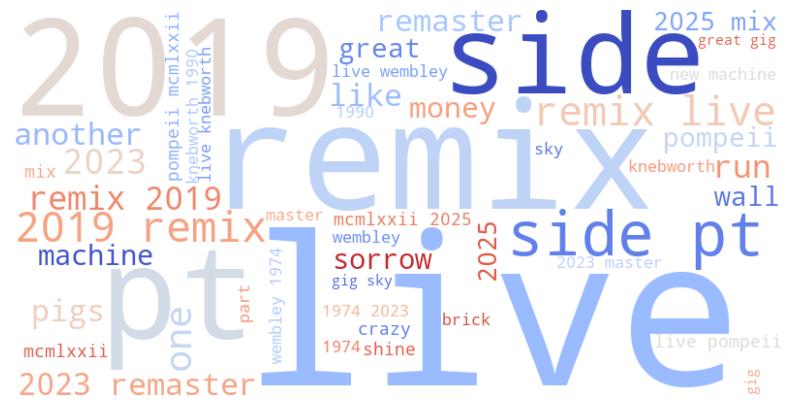

In [42]:
# nombre del artista
nombre_artista = "Pink Floyd"
resultados_artista = sp.search(q=nombre_artista, type="artist", limit=1)

# obtener el ID artista
if resultados_artista["artists"]["items"]:
    id_artista = resultados_artista["artists"]["items"][0]["id"]

    # obtener los álbumes del artista
    albums = sp.artist_albums(id_artista, album_type="album")

    # Extraer títulos de canciones
    titulos_canciones = []
    for album in albums["items"]:
        tracks = sp.album_tracks(album["id"])
        titulos_canciones.extend([track["name"] for track in tracks["items"]])

    # Convertir a minúsculas y eliminar stopwords
    
    stop_words = set(stopwords.words("english"))

    titulos_procesados = [" ".join([word.lower() for word in titulo.split() if word.lower() not in stop_words])
                          for titulo in titulos_canciones]

    # Aplicar TF-IDF para obtener palabras clave
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50)
    X = vectorizer.fit_transform(titulos_procesados)

    # Obtener las palabras más importantes
    palabras_importantes = vectorizer.get_feature_names_out()

    # Crear un diccionario con la importancia de las palabras
    valores_importancia = X.sum(axis=0).tolist()[0]
    diccionario_palabras = dict(zip(palabras_importantes, valores_importancia))

    # mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    nube_palabras = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm")
    nube_palabras.generate_from_frequencies(diccionario_palabras)
    plt.imshow(nube_palabras, interpolation="bilinear")
    plt.axis("off")
    plt.show()

else:
    print("No se encontró al artista.")